#For training the model from scratch:
Download dataset from here: https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format


In [ ]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [ ]:
class LeNet:
    def build(width, height, depth, classes):
             model = Sequential()     #initialize the model 
             inputshape=(height,width,depth) #128*28*3
#first set of conv => relu => max pooling
             model.add(Conv2D(20,(5,5),padding='same',input_shape=inputshape)) # 124*124*20
             model.add(Activation('relu'))# 124*124*20
             model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2))) #62*62*20           
            
#second set of conv => relu => max pooling
             model.add(Conv2D(50,(5,5),padding='same')) #58*58*50
             model.add(Activation('relu'))  #58*58*50
             model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))  # 29*29*50
# first (and only) set of FC => RELU layers
             model.add(Flatten())
             model.add(Dense(500))
             model.add(Activation("relu"))

# softmax classifier
             model.add(Dense(classes))  # creates nodes equal to  output number of classes 
             model.add(Activation('softmax'))  # converts the value into probability coressponding to each class 
             return model 

In [ ]:
pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=82a129741b3399265b0b3bbc95aea1f229ea1510f14069f34240e883e5dc5088
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
import matplotlib
%matplotlib notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
import  import_ipynb
##import model
##from model import LeNet
import imutils
from tensorflow.keras.preprocessing import image

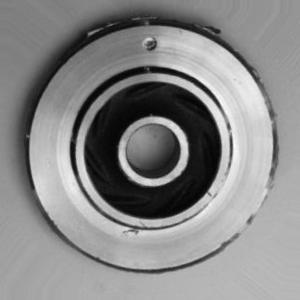

In [ ]:
img = image.load_img('/content/drive/MyDrive/Type_defects/Both/cast_def_0_1088.jpeg')
img

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:

EPOCHS = 25
INIT_LR = 1e-3
BS = 32
data = []
labels = []
args=dict({'dataset':"/content/drive/MyDrive/Type_defects",
           'model':r'/content/drive/MyDrive'})
imagePaths=sorted(list(paths.list_images(args['dataset'])))

In [ ]:
random.seed(20)
random.shuffle(imagePaths)
##imagePaths
imagePaths

In [ ]:
for i in imagePaths:
    image = cv2.imread(i)
    image=cv2.resize(image,(28,28))
    image_matrix=img_to_array(image)
    data.append(image_matrix)
    label= i.split(os.path.sep)[-2]
    if label == 'Blowhole':
        label=2
    elif label == 'Scratch':
        label=1
    else :label== 0    
    labels.append(label)

In [ ]:
##labels

In [ ]:
for i in range(len(labels)):
  if labels[i]=='Both' :
    labels[i]=0

In [ ]:
##count=0
##for i in labels:
##  count=count+1

In [ ]:

data =np.array(data,dtype='float')/255
labels=np.array(labels)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.25,random_state=40)

In [ ]:
y_train= to_categorical(y_train,num_classes=3)
y_test= to_categorical(y_test,num_classes=3)

In [ ]:
#  Using Data Aungmentaion to create more training images
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
horizontal_flip=True, fill_mode="nearest") 

In [ ]:
# initilaizing the model :
print("Compiling model")
model= LeNet.build(width=28,height=28,depth=3,classes=3)
opt=  Adam(learning_rate=INIT_LR,beta_1=0.9,beta_2=0.999,decay=INIT_LR /25)
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
print("training netwrok")

H=model.fit_generator(aug.flow(x_train,y_train,batch_size=BS),validation_data=(x_test, y_test),
                    epochs=40,verbose=1,steps_per_epoch=len(x_train) // BS)

Compiling model
training netwrok
Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


97/97 [==============================] - 10s 92ms/step - loss: 1.0008 - accuracy: 0.5405 - val_loss: 0.8755 - val_accuracy: 0.5656
Epoch 2/40
97/97 [==============================] - 8s 86ms/step - loss: 0.8972 - accuracy: 0.5716 - val_loss: 0.8187 - val_accuracy: 0.5965
Epoch 3/40
97/97 [==============================] - 8s 88ms/step - loss: 0.8316 - accuracy: 0.6316 - val_loss: 0.6905 - val_accuracy: 0.6892
Epoch 4/40
97/97 [==============================] - 8s 87ms/step - loss: 0.7765 - accuracy: 0.6690 - val_loss: 0.6393 - val_accuracy: 0.7307
Epoch 5/40
97/97 [==============================] - 8s 87ms/step - loss: 0.7126 - accuracy: 0.6977 - val_loss: 0.5798 - val_accuracy: 0.7770
Epoch 6/40
97/97 [==============================] - 8s 86ms/step - loss: 0.6267 - accuracy: 0.7617 - val_loss: 0.5549 - val_accuracy: 0.7954
Epoch 7/40
97/97 [==============================] - 9s 88ms/step - loss: 0.6436 - accuracy: 0.7317 - val_loss: 0.6101 - val_accuracy: 0.7722
Epoch 8/40
97/97 [=====

In [ ]:
model.save('my_modeltype.h5') 

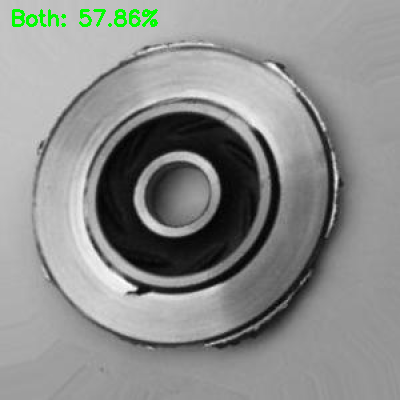

-1

In [ ]:
#FONT_HERSHEY_COMPLEX
#FONT_HERSHEY_SIMPLEX
#image = cv2.imread(testimagePaths_rand[0])
path='/content/drive/MyDrive/Type_defects/Both/cast_def_0_7141.jpeg'
image = cv2.imread(path)
org=image.copy()
image=cv2.resize(image,(28,28))
image_matrix=img_to_array(image)
image_matrix=np.array(image_matrix,dtype='float')/255
image = np.expand_dims(image_matrix, axis=0)
Both,Scratch,Blowhole=model.predict(image)[0]

if  Blowhole > Both and Blowhole > Scratch:
    label ='Blowhole'
elif Both > Blowhole  and Both > Scratch :
   label='Both'
elif Scratch > Blowhole and Scratch> Both :
   label='Scratch'
if Blowhole > Both and Blowhole > Scratch:
    prob = Blowhole 
elif  Both > Blowhole and Both > Scratch :
    prob = Both
elif  Scratch > Blowhole and Scratch> Both :
    prob = Scratch
##else : prob =def_front  
label = "{}: {:.2f}%".format(label, prob * 100)
output = imutils.resize(org, width=400)
cv2.putText(output, label, (10, 25),cv2.FONT_HERSHEY_SIMPLEX,	0.7, (0, 255, 0), 2)
cv2_imshow(output)
cv2.waitKey(0)

Use the weights file 'defect_classification.h5' given in the 'defect detection' folder

In [6]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [7]:
class LeNet:
    def build(width, height, depth, classes):
             model = Sequential()     #initialize the model 
             inputshape=(height,width,depth) #128*28*3
#first set of conv => relu => max pooling
             model.add(Conv2D(20,(5,5),padding='same',input_shape=inputshape)) # 124*124*20
             model.add(Activation('relu'))# 124*124*20
             model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2))) #62*62*20           
            
#second set of conv => relu => max pooling
             model.add(Conv2D(50,(5,5),padding='same')) #58*58*50
             model.add(Activation('relu'))  #58*58*50
             model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))  # 29*29*50
# first (and only) set of FC => RELU layers
             model.add(Flatten())
             model.add(Dense(500))
             model.add(Activation("relu"))

# softmax classifier
             model.add(Dense(classes))  # creates nodes equal to  output number of classes 
             model.add(Activation('softmax'))  # converts the value into probability coressponding to each class 
             return model 

In [9]:
model= LeNet.build(width=28,height=28,depth=3,classes=3)


In [10]:
model.load_weights('/content/defect_classification.h5')

In [11]:
from google.colab.patches import cv2_imshow

In [12]:
import matplotlib
%matplotlib notebook
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
##import model
##from model import LeNet
import imutils
from tensorflow.keras.preprocessing import image

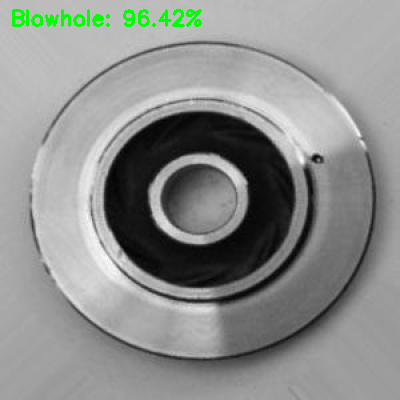

-1

In [17]:
#FONT_HERSHEY_COMPLEX
#FONT_HERSHEY_SIMPLEX
#image = cv2.imread(testimagePaths_rand[0])
path='/content/3.png'
image = cv2.imread(path)
org=image.copy()
image=cv2.resize(image,(28,28))
image_matrix=img_to_array(image)
image_matrix=np.array(image_matrix,dtype='float')/255
image = np.expand_dims(image_matrix, axis=0)
Both,Scratch,Blowhole=model.predict(image)[0]

if  Blowhole > Both and Blowhole > Scratch:
    label ='Blowhole'
elif Both > Blowhole  and Both > Scratch :
   label='Both'
elif Scratch > Blowhole and Scratch> Both :
   label='Scratch'
if Blowhole > Both and Blowhole > Scratch:
    prob = Blowhole 
elif  Both > Blowhole and Both > Scratch :
    prob = Both
elif  Scratch > Blowhole and Scratch> Both :
    prob = Scratch
##else : prob =def_front  
label = "{}: {:.2f}%".format(label, prob * 100)
output = imutils.resize(org, width=400)
cv2.putText(output, label, (10, 25),cv2.FONT_HERSHEY_SIMPLEX,	0.7, (0, 255, 0), 2)
cv2_imshow(output)
cv2.waitKey(0)